In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/bourne_scenario.csv")

In [3]:
df

,page_no,scene_title,text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...
...,...,...,...
315,119,356 EXT. HOUSING PROJECT PLAYGROUND --...,356 BOURNE trudging along. Ac...
316,121,357 INT. HOSPITAL ROOM -- DAY,357 BOURNE waking up -- sittin...
317,121,358 INT. HOSPITAL CORRIDOR -- DAY,"358 Long, sterile hallway. CR..."
318,121,359 INT. HOSPITAL ROOM -- DAY,359 Empty bed. Open window. ...


In [4]:
#기본 정보 탐색
df.isnull().sum()

page_no        0
scene_title    0
text           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   page_no      320 non-null    int64 
 1   scene_title  320 non-null    object
 2   text         320 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [6]:
#전처리

In [7]:
def apply_regular_expression(text):
    text = text.lower()
    english = re.compile('[^ a-z]')
    result = english.sub('', text)
    result = re.sub(' +', ' ',result)
    return result

In [8]:
#확인
apply_regular_expression(df['text'][0])

' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed '

In [9]:
#전체적용
df['preprocessed_text'] = df['text'].apply(lambda x: apply_regular_expression(x))

In [10]:
df.head()

,page_no,scene_title,text,preprocessed_text
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...


In [11]:
#wordCount

In [12]:
#말뭉치 (코퍼스) 생성

corpus = df['preprocessed_text'].tolist()
corpus[:5] #간략히 확인

[' its raining light strobes across the wet glass at a rhythmic pace suddenly through the window a face jason bourne riding in the backseat his gaze fixed ',
 ' a on his knee a syringe and a gun the eyes of the driver jarda watching bournes pov the passenger back of his head cell phone rings the head turns its conklin bourne returns his stare ',
 ' bournes eyes open panicked gasping trying to stay quiet marie sleeps ',
 ' a bourne moving for the medicine cabinet digs through the medicine cabinet downs something specific ',
 ' one minute later bourne moves out onto the veranda marie pads in watching him for a moment concerned clearly its not the first time this has happened they both look different than last we saw them his hair is longer shes a blonde hippie travelers their cottage is humble but sweet the bedroom opens to a beach and a town just down the hill club music from some all night rave wafting in from the far distance marie where were you jason bourne in the car conklin up fro

In [13]:
#BOW 백터 생성

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer=None, stop_words="english", analyzer='word').fit(corpus)
bow_vect = vect.fit_transform(corpus)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis = 0)

In [14]:
count_list

array([ 3,  3,  2, ...,  1, 42,  3], dtype=int64)

In [15]:
word_count_dict = dict(zip(word_list, count_list))

import operator

sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63)]

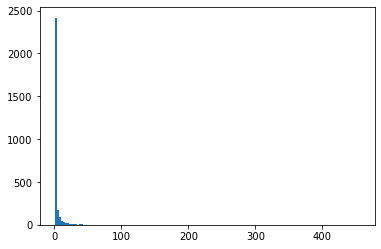

In [16]:
#단어 분포 탐색
plt.hist(list(word_count_dict.values()), bins=150)
plt.show()

In [17]:
#텍스트 마이닝 
"""
워드클라우드 시각화
"""

'\n워드클라우드 시각화\n'

In [18]:
!pip install pytagcloud pygame simplejson

pygame 2.1.0 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


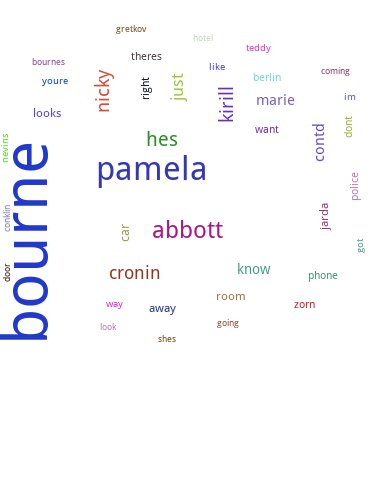

In [19]:
from collections import Counter

import random
import pytagcloud
import webbrowser

ranked_tags = Counter(word_count_dict).most_common(25)
taglist = pytagcloud.make_tags(sorted(word_count_dict.items(), key=operator.itemgetter(1), reverse=True)[:40], maxsize=60)
pytagcloud.create_tag_image(taglist, 'wordcloud_example.jpg', 
                            rectangular=False)

from IPython.display import Image
Image(filename='wordcloud_example.jpg')

In [20]:
Counter(word_count_dict).most_common(25)

[('bourne', 455),
 ('pamela', 199),
 ('abbott', 128),
 ('hes', 100),
 ('kirill', 93),
 ('nicky', 90),
 ('cronin', 81),
 ('just', 80),
 ('marie', 67),
 ('contd', 63),
 ('know', 61),
 ('car', 51),
 ('away', 48),
 ('room', 44),
 ('jarda', 43),
 ('looks', 43),
 ('dont', 42),
 ('zorn', 42),
 ('phone', 40),
 ('right', 39),
 ('theres', 39),
 ('police', 38),
 ('want', 38),
 ('berlin', 37),
 ('teddy', 35)]

In [21]:
#장면별 주요 시각화

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [22]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(320, 2850)
  (0, 2788)	0.19578974958217082
  (0, 2763)	0.27550455848587985
  (0, 2412)	0.1838379942679887
  (0, 2387)	0.3109660261831164
  (0, 1984)	0.2902223973596984
  (0, 1978)	0.3109660261831164
  (0, 1898)	0.27550455848587985
  (0, 1673)	0.2902223973596984
  (0, 1366)	0.21520447034992146
  (0, 1251)	0.19855583314180728
  (0, 1001)	0.2340173008390438
  (0, 974)	0.2902223973596984
  (0, 874)	0.27550455848587985
  (0, 798)	0.1906694714764746
  (0, 237)	0.08646242181596513
  (0, 125)	0.26408851574819875


In [23]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 2850)
[[0. 0. 0. ... 0. 0. 0.]]


In [24]:
#백터 단어 매칭
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{1898: 'raining', 1366: 'light', 2387: 'strobes', 2763: 'wet', 1001: 'glass', 1978: 'rhythmic', 1673..


In [25]:
#중요 단어 추출 TOP3 TF-IDF
np.argsort(tf_idf_vect[0].toarray())[0][-3:]

array([1984, 2387, 1978], dtype=int64)

In [26]:
np.argsort(tf_idf_vect.toarray())[:, -3:]

array([[1984, 2387, 1978],
       [1297, 1971, 1097],
       [1693, 2221,  968],
       [ 690,  299, 1482],
       [2823, 1951, 1454],
       [2218, 2815, 1454],
       [2038,  737, 2418],
       [ 852, 2761, 2570],
       [2022,  156, 1352],
       [2250, 2241, 1454],
       [ 342,  321, 2188],
       [ 614, 1557, 1534],
       [ 535, 1884, 1614],
       [2188,  139,   20],
       [ 503,  730, 1458],
       [2790, 2384,  724],
       [ 169,  915, 2444],
       [1905, 1259,   53],
       [2566, 1335,  828],
       [2300,  281, 1702],
       [2503, 1502, 2567],
       [ 794, 1454, 1018],
       [ 698, 2559, 1252],
       [1871,  237, 1454],
       [ 204,  911, 2591],
       [ 237,  596, 1454],
       [  52,  941, 1036],
       [ 211, 1156,  206],
       [1193, 2712, 1454],
       [  52, 1809, 2462],
       [ 237, 1454,  702],
       [2130,  237, 1454],
       [1995, 1890,  321],
       [1011,  259, 1454],
       [1985, 2216, 1819],
       [ 420, 2276, 1454],
       [2019, 1103, 2059],
 

In [27]:
top_3_word = np.argsort(tf_idf_vect.toarray())[:, -3:]
df['important_word_indexes'] = pd.Series(top_3_word.tolist())
df.head()

,page_no,scene_title,text,preprocessed_text,important_word_indexes
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]"


In [28]:
def convert_to_word(x): #리스트가 들어오면 인덱스에 해당하는 KEY 값을 찾아줌
    word_list = []
    for word in x:
        word_list.append(invert_index_vectorizer[word])
    return word_list

In [29]:
df['important_words'] = df['important_word_indexes'].apply(lambda x: convert_to_word(x))
df.head() #가장 중요한 단어들이 3개씩 출력됨

,page_no,scene_title,text,preprocessed_text,important_word_indexes,important_words
0,1,1 EXT. MERCEDES WINDSHIELD -- DUSK,1 It's raining... ...,its raining light strobes across the wet glas...,"[1984, 2387, 1978]","[riding, strobes, rhythmic]"
1,1,A1 INT. MERCEDES -- NIGHT,A1 On his knee -- a syringe an...,a on his knee a syringe and a gun the eyes of...,"[1297, 1971, 1097]","[knee, returns, head]"
2,1,2 INT. COTTAGE BEDROOM -- NIGHT,2 BOURNE'S EYES OPEN! -- panic...,bournes eyes open panicked gasping trying to ...,"[1693, 2221, 968]","[panicked, sleeps, gasping]"
3,1,A2 INT. COTTAGE LIVING AREA/BATHROOM ...,A2 BOURNE moving for the medic...,a bourne moving for the medicine cabinet digs...,"[690, 299, 1482]","[downs, cabinet, medicine]"
4,2,3 INT./EXT. COTTAGE LIVING ROOM/VERA...,3 One minute later. BOURNE mo...,one minute later bourne moves out onto the ve...,"[2823, 1951, 1454]","[write, remember, marie]"
